In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [3]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [4]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [5]:
df.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [6]:
df.drop('Data_Value_Unit',axis=1,inplace=True)

In [7]:
df['Class'][df['Question']=='Percent of adults aged 18 years and older who have obesity'].unique()

array(['Obesity / Weight Status'], dtype=object)

In [8]:
df.columns.is_numeric()

False

In [9]:
df.select_dtypes(include='number').columns

Index(['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'LocationID'],
      dtype='object')

In [10]:
num={'YearStart', 'YearEnd', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'LocationID'}
disc=set(df.columns).difference(num)

In [11]:
for i in disc:
    print(i ,'->', df[i].nunique())
    print(df[i].unique())
    print('-'*50)

Data_Value_Footnote -> 2
[nan 'Data not available because sample size is insufficient.'
 'Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.']
--------------------------------------------------
TopicID -> 3
['OWS1' 'FV1' 'PA1']
--------------------------------------------------
QuestionID -> 9
['Q036' 'Q037' 'Q018' 'Q019' 'Q046' 'Q043' 'Q044' 'Q045' 'Q047']
--------------------------------------------------
Data_Value_Type -> 1
['Value']
--------------------------------------------------
StratificationID1 -> 28
['OVERALL' 'MALE' 'FEMALE' 'EDUHS' 'EDUHSGRAD' 'EDUCOTEC' 'EDUCOGRAD'
 'AGEYR1824' 'AGEYR2534' 'AGEYR3544' 'AGEYR4554' 'AGEYR5564' 'AGEYR65PLUS'
 'INCLESS15' 'INC1525' 'INC2535' 'INC3550' 'INC5075' 'INC75PLUS' 'INCNR'
 'RACEWHT' 'RACEBLK' 'RACEHIS' 'RACEASN' 'RACEHPI' 'RACENAA' 'RACE2PLUS'
 'RACEOTH']
--------------------------------------------------
StratificationCategoryId1 -> 

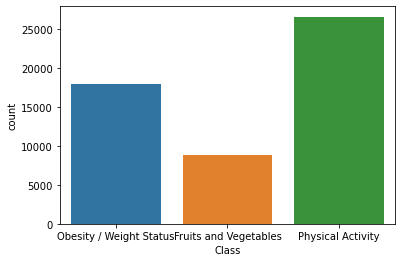

In [12]:

sns.countplot(x=df['Class'])
plt.show()

In [13]:
df['Question']=df['Question'].replace('Percent of adults aged 18 years and older who have obesity','Obese')
df['Question']=df['Question'].replace('Percent of adults aged 18 years and older who have an overweight classification','Overweight')
df['Question']=df['Question'].replace('Percent of adults who report consuming fruit less than one time daily','AntiFruit')
df['Question']=df['Question'].replace('Percent of adults who report consuming vegetables less than one time daily','AntiVeggie')
df['Question']=df['Question'].replace('Percent of adults who engage in muscle-strengthening activities on 2 or more days a week','Muscular')
df['Question']=df['Question'].replace('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)','Aerobic')
df['Question']=df['Question'].replace('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week','AeroMuscular')
df['Question']=df['Question'].replace('Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)','AeroFreak')
df['Question']=df['Question'].replace('Percent of adults who engage in no leisure-time physical activity','Unfit')

In [14]:
df.drop(columns=['GeoLocation','Data_Value_Type','LocationDesc','Data_Value_Footnote','DataValueTypeID','Gender','Income','Race/Ethnicity',
                 'Stratification1','Data_Value_Footnote_Symbol','Total','StratificationID1','Datasource'],axis=1,inplace=True)

In [15]:
df.shape

(53392, 19)

In [16]:
df.isna().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
Class                            0
Topic                            0
Question                         0
Data_Value                    5046
Data_Value_Alt                5046
Low_Confidence_Limit          5046
High_Confidence_Limit         5046
Sample_Size                   5046
Age(years)                   41954
Education                    45764
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategory1          0
StratificationCategoryId1        0
dtype: int64

In [17]:
df.head(2)

,YearStart,YearEnd,LocationAbbr,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,StratificationCategoryId1
0,2011,2011,AL,Obesity / Weight Status,Obesity / Weight Status,Obese,32.0,32.0,30.5,33.5,7304.0,NaN,NaN,OWS,OWS1,Q036,1,Total,OVR
1,2011,2011,AL,Obesity / Weight Status,Obesity / Weight Status,Obese,32.3,32.3,29.9,34.7,2581.0,NaN,NaN,OWS,OWS1,Q036,1,Gender,GEN


In [18]:
df.corr()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,1.000000,-0.001504,-0.001504,-0.006593,0.003190,-0.011121,0.044424
YearEnd,1.000000,1.000000,-0.001504,-0.001504,-0.006593,0.003190,-0.011121,0.044424
Data_Value,-0.001504,-0.001504,1.000000,1.000000,0.956605,0.941565,-0.005854,-0.002525
Data_Value_Alt,-0.001504,-0.001504,1.000000,1.000000,0.956605,0.941565,-0.005854,-0.002525
Low_Confidence_Limit,-0.006593,-0.006593,0.956605,0.956605,1.000000,0.804783,0.048949,0.012457
High_Confidence_Limit,0.003190,0.003190,0.941565,0.941565,0.804783,1.000000,-0.063228,-0.018078
Sample_Size,-0.011121,-0.011121,-0.005854,-0.005854,0.048949,-0.063228,1.000000,0.162963
LocationID,0.044424,0.044424,-0.002525,-0.002525,0.012457,-0.018078,0.162963,1.000000


In [19]:
df.drop(columns=['YearEnd','Data_Value_Alt'],axis=1,inplace=True)

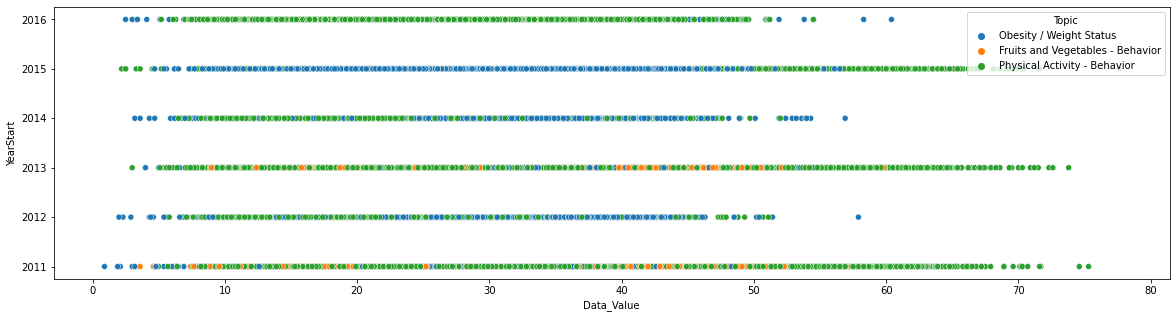

In [20]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['Data_Value'],y=df['YearStart'],hue=df['Topic'])
plt.show()

In [21]:
df[df['Class'] != df['Topic']]

,YearStart,LocationAbbr,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,StratificationCategoryId1
56,2011,AL,Fruits and Vegetables,Fruits and Vegetables - Behavior,AntiFruit,43.8,42.1,45.5,7231.0,NaN,NaN,FV,FV1,Q018,1,Total,OVR
57,2011,AL,Fruits and Vegetables,Fruits and Vegetables - Behavior,AntiFruit,35.4,33.0,37.9,2408.0,65 or older,NaN,FV,FV1,Q018,1,Age (years),AGEYR
58,2011,AL,Fruits and Vegetables,Fruits and Vegetables - Behavior,AntiFruit,35.4,23.0,50.2,110.0,NaN,NaN,FV,FV1,Q018,1,Race/Ethnicity,RACE
59,2011,AL,Fruits and Vegetables,Fruits and Vegetables - Behavior,AntiFruit,36.1,33.1,39.1,1844.0,NaN,College graduate,FV,FV1,Q018,1,Education,EDU
60,2011,AL,Fruits and Vegetables,Fruits and Vegetables - Behavior,AntiFruit,37.4,21.6,56.5,57.0,NaN,NaN,FV,FV1,Q018,1,Race/Ethnicity,RACE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,VI,Physical Activity,Physical Activity - Behavior,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE
53388,2016,VI,Physical Activity,Physical Activity - Behavior,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE
53389,2016,VI,Physical Activity,Physical Activity - Behavior,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE
53390,2016,VI,Physical Activity,Physical Activity - Behavior,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE


In [22]:
df.drop('Topic',1,inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_10384\3946974100.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Topic',1,inplace=True)


In [23]:
df

,YearStart,LocationAbbr,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,StratificationCategoryId1
0,2011,AL,Obesity / Weight Status,Obese,32.0,30.5,33.5,7304.0,NaN,NaN,OWS,OWS1,Q036,1,Total,OVR
1,2011,AL,Obesity / Weight Status,Obese,32.3,29.9,34.7,2581.0,NaN,NaN,OWS,OWS1,Q036,1,Gender,GEN
2,2011,AL,Obesity / Weight Status,Obese,31.8,30.0,33.6,4723.0,NaN,NaN,OWS,OWS1,Q036,1,Gender,GEN
3,2011,AL,Obesity / Weight Status,Obese,33.6,29.9,37.6,1153.0,NaN,Less than high school,OWS,OWS1,Q036,1,Education,EDU
4,2011,AL,Obesity / Weight Status,Obese,32.8,30.2,35.6,2402.0,NaN,High school graduate,OWS,OWS1,Q036,1,Education,EDU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,VI,Physical Activity,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE
53388,2016,VI,Physical Activity,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE
53389,2016,VI,Physical Activity,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE
53390,2016,VI,Physical Activity,Unfit,NaN,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE


In [24]:
df.isna().sum()

YearStart                        0
LocationAbbr                     0
Class                            0
Question                         0
Data_Value                    5046
Low_Confidence_Limit          5046
High_Confidence_Limit         5046
Sample_Size                   5046
Age(years)                   41954
Education                    45764
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategory1          0
StratificationCategoryId1        0
dtype: int64

In [25]:
df.dropna(subset=['Data_Value'],inplace=True)

In [26]:
df

,YearStart,LocationAbbr,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,StratificationCategoryId1
0,2011,AL,Obesity / Weight Status,Obese,32.0,30.5,33.5,7304.0,NaN,NaN,OWS,OWS1,Q036,1,Total,OVR
1,2011,AL,Obesity / Weight Status,Obese,32.3,29.9,34.7,2581.0,NaN,NaN,OWS,OWS1,Q036,1,Gender,GEN
2,2011,AL,Obesity / Weight Status,Obese,31.8,30.0,33.6,4723.0,NaN,NaN,OWS,OWS1,Q036,1,Gender,GEN
3,2011,AL,Obesity / Weight Status,Obese,33.6,29.9,37.6,1153.0,NaN,Less than high school,OWS,OWS1,Q036,1,Education,EDU
4,2011,AL,Obesity / Weight Status,Obese,32.8,30.2,35.6,2402.0,NaN,High school graduate,OWS,OWS1,Q036,1,Education,EDU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Physical Activity,Unfit,13.3,8.0,21.2,212.0,NaN,NaN,PA,PA1,Q047,78,Income,INC
53383,2016,VI,Physical Activity,Unfit,25.3,16.4,37.0,137.0,NaN,NaN,PA,PA1,Q047,78,Income,INC
53384,2016,VI,Physical Activity,Unfit,18.3,10.8,29.2,154.0,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE
53385,2016,VI,Physical Activity,Unfit,24.1,19.9,28.9,820.0,NaN,NaN,PA,PA1,Q047,78,Race/Ethnicity,RACE


In [27]:
df.isna().sum()

YearStart                        0
LocationAbbr                     0
Class                            0
Question                         0
Data_Value                       0
Low_Confidence_Limit             0
High_Confidence_Limit            0
Sample_Size                      0
Age(years)                   36908
Education                    40718
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategory1          0
StratificationCategoryId1        0
dtype: int64

<AxesSubplot:xlabel='Data_Value', ylabel='Class'>

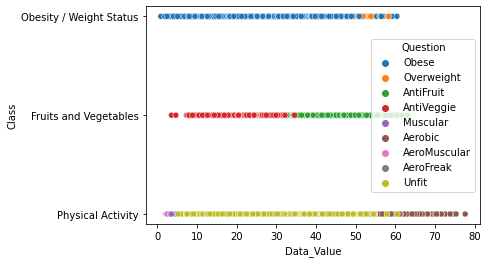

In [28]:
sns.scatterplot(y=df['Class'],x=df['Data_Value'],hue=df['Question'])

In [30]:
gb=df.groupby(['LocationAbbr','YearStart']).mean().reset_index()
gb

,LocationAbbr,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
0,AK,2011,33.474667,27.702222,39.955111,775.888889,2.0
1,AK,2012,27.992593,22.864198,33.979012,923.432099,2.0
2,AK,2013,33.560256,28.067521,39.696581,970.529915,2.0
3,AK,2014,28.646154,23.584615,34.453846,967.307692,2.0
4,AK,2015,33.675652,27.166522,41.099565,778.921739,2.0
...,...,...,...,...,...,...,...
315,WY,2012,28.616667,23.743056,34.244444,1506.958333,56.0
316,WY,2013,32.012889,26.977778,37.885778,1415.844444,56.0
317,WY,2014,29.544000,23.837333,36.396000,1460.160000,56.0
318,WY,2015,33.674879,28.266184,39.694686,1270.420290,56.0


In [31]:
gb.drop(columns=['LocationID','Sample_Size'],axis=1,inplace=True)

In [32]:
gb=pd.get_dummies(gb,drop_first=True)

In [33]:
gb.head()

,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,LocationAbbr_TX,LocationAbbr_US,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VI,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY
0,2011,33.474667,27.702222,39.955111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,27.992593,22.864198,33.979012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,33.560256,28.067521,39.696581,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,28.646154,23.584615,34.453846,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,33.675652,27.166522,41.099565,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x=gb.drop('Data_Value',axis=1)
y=gb['Data_Value']

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [39]:
model=LinearRegression()
model.fit(xtrain,ytrain)
train_pred=model.predict(xtrain)
test_pred=model.predict(xtest)
print('-'*50)
print('Train acc',r2_score(ytrain,train_pred))
print('Test acc',r2_score(ytest,test_pred))
print('-'*50)
print(np.sqrt(mean_squared_error(ytest,test_pred)))

--------------------------------------------------
Train acc 0.9998637642950281
Test acc 0.9996644377448154
--------------------------------------------------
0.03366774576796


In [40]:
from sklearn.model_selection import cross_val_score
res=cross_val_score(model,x,y,cv=10)
res.mean()

0.9986372074417819